In [4]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [3]:
data = pd.read_csv("transfusion.data")
data.columns = ['Recency', 'Frequency', 'Monetary', 'Time', 'Class']
data.head()

,Recency,Frequency,Monetary,Time,Class
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0


In [ ]:
cl = "whether he/she donated blood in March 2007"
rec = "Recency (months)"
tm = "Time (months)"
mnt = "Monetary (c.c. blood)"
frq = "Frequency (times)"
fts = [rec, frq, mnt, tm]
figure, axis = plt.subplots(len(fts), len(fts), figsize = (25, 25))
for i in range(len(fts)):
    for j in range(len(fts)):
        if i != j:
            axis[i, j].scatter(x=data[fts[i]][data[cl] == 1], y=data[fts[j]][data[cl] == 1], s=10, c="blue")
            axis[i, j].scatter(x=data[fts[i]][data[cl] == 0], y=data[fts[j]][data[cl] == 0], s=10, c="red")
            axis[i, j].set_ylabel(fts[j])
        else:
            axis[i, j].hist(data[fts[i]], bins=20)
        axis[i, j].set_xlabel(fts[i])
figure.legend(["hist", "donated", "NOT donated"], fontsize=20)

<AxesSubplot:xlabel='Frequency', ylabel='Monetary'>

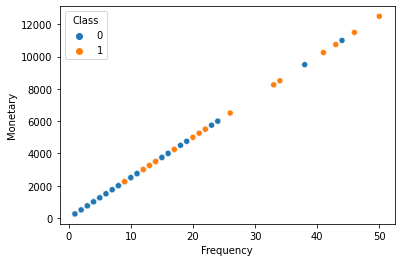

In [18]:
sns.scatterplot(data=data, x="Frequency", y="Monetary", hue='Class')

In [ ]:
data.drop(columns=[mnt], inplace=True)
fts.remove(mnt)

figure, axis = plt.subplots(1, len(fts), figsize=(20, 5))
for i in range(len(fts)):
    axis[i].boxplot(data[fts[i]])
    axis[i].set_xlabel(fts[i])
plt.boxplot(data[fts])
plt.xticks([1, 2, 3], fts)

figure, axis = plt.subplots(1, len(fts), figsize=(20, 5))
for i in range(len(fts)):
    axis[i].boxplot((data[fts[i]][data[cl] == 0], data[fts[i]][data[cl] == 1]))
    axis[i].set_xticklabels(["NOT donated", "Donated"])
    axis[i].set_title(fts[i])


<AxesSubplot:xlabel='Class', ylabel='Recency'>

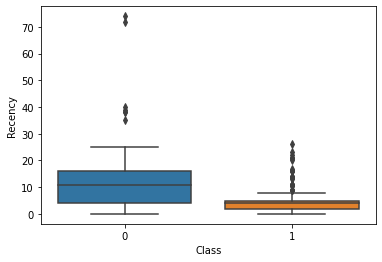

In [7]:
sns.boxplot(y='Recency', x='Class', data=data)

<AxesSubplot:xlabel='Class', ylabel='Frequency'>

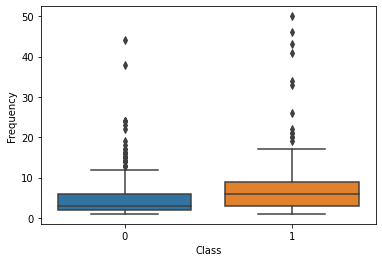

In [8]:
sns.boxplot(y='Frequency', x='Class', data=data)

<AxesSubplot:xlabel='Class', ylabel='Monetary'>

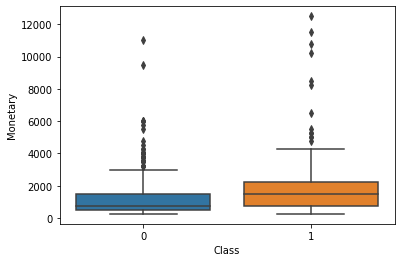

In [9]:
sns.boxplot(y='Monetary', x='Class', data=data)

<AxesSubplot:xlabel='Class', ylabel='Time'>

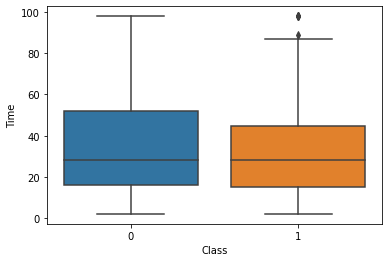

In [10]:
sns.boxplot(y='Time', x='Class', data=data)

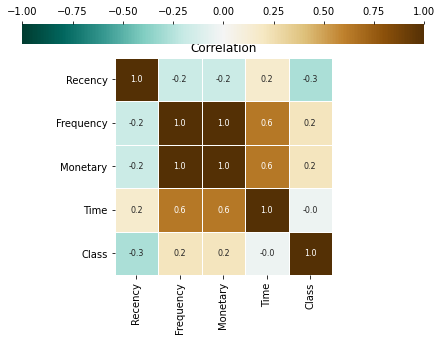

In [13]:
plt.figure(figsize=(8,5))
sns.heatmap(data.corr(), vmax=1, vmin=-1, center=0, linewidth=.5,square=True, annot = True,
            annot_kws = {'size':8},fmt='.1f', cmap='BrBG_r',
            cbar_kws = dict(use_gridspec=False,location="top", shrink=0.9))
plt.title('Correlation')
plt.show()